### Análisis de datos sobre el precio de las casas en Ames, Iowa, Estados Unidos

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('../data/train.csv')
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
# Ésto es para que no se confundan con variables numéricas, ya que cada número en 
# MSSubClass y OverallCond representa una categoría pero no son variables numéricas en si mismas.
df.isna().sum().sort_values(ascending=False)
# Aquí se comprueba si existen valores nulos

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [39]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
print(f'{cat_cols}\n{num_cols}')
# Aquí agrupo las columnas en numéricas y categóricas para analizarlas por separado

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       

In [40]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna('Missing Value')
df.isna().sum().sort_values(ascending=False)
# Lo que hice en esta celda es rellenar los valores nulos, 
# con la media para las columnas numéricas y con 'Missing Value' para las categóricas.

/tmp/ipykernel_1491/2371385799.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].fillna('Missing Value')


Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

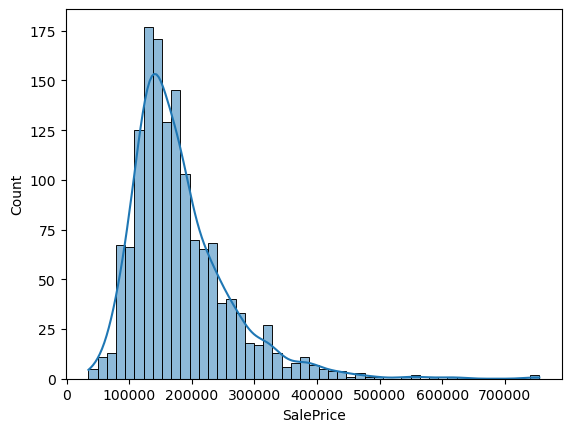

In [41]:
sns.histplot(df['SalePrice'], kde=True)
plt.savefig('../images/price_dist.png')

distribución del rango de precios en un gráfico de histograma.

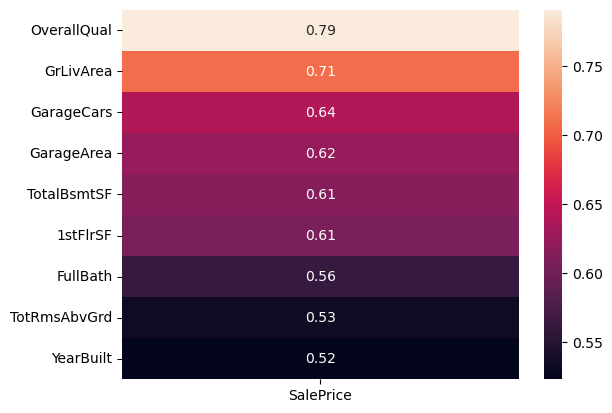

In [42]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix['SalePrice'].sort_values(ascending=False).to_frame().iloc[1:10], annot=True)
plt.savefig('../images/numeric_vars_heatmap.png')

Aqui analizamos la correlación lineal de las variables numéricas respecto del precio y seleccionamos las columnas a analizar.

In [43]:
# dfsc => Data frame with only selected columns
dfsc = df[[
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBsmtSF',
    '1stFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt',
    'MSZoning',
    'LotConfig',
    'Neighborhood',
    'OverallCond',
    'HouseStyle',
    'SalePrice'
]].copy()
dfsc.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,MSZoning,LotConfig,Neighborhood,OverallCond,HouseStyle,SalePrice
0,7,1710,2,856,856,2,8,2003,RL,Inside,CollgCr,5,2Story,208500
1,6,1262,2,1262,1262,2,6,1976,RL,FR2,Veenker,8,1Story,181500
2,7,1786,2,920,920,2,6,2001,RL,Inside,CollgCr,5,2Story,223500
3,7,1717,3,756,961,1,7,1915,RL,Corner,Crawfor,5,2Story,140000
4,8,2198,3,1145,1145,2,9,2000,RL,FR2,NoRidge,5,2Story,250000


In [44]:
dfsc.info()
dfsc.describe().round()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   GrLivArea     1460 non-null   int64 
 2   GarageCars    1460 non-null   int64 
 3   TotalBsmtSF   1460 non-null   int64 
 4   1stFlrSF      1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   TotRmsAbvGrd  1460 non-null   int64 
 7   YearBuilt     1460 non-null   int64 
 8   MSZoning      1460 non-null   object
 9   LotConfig     1460 non-null   object
 10  Neighborhood  1460 non-null   object
 11  OverallCond   1460 non-null   int64 
 12  HouseStyle    1460 non-null   object
 13  SalePrice     1460 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 159.8+ KB


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,OverallCond,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,6.0,1515.0,2.0,1057.0,1163.0,2.0,7.0,1971.0,6.0,180921.0
std,1.0,525.0,1.0,439.0,387.0,1.0,2.0,30.0,1.0,79443.0
min,1.0,334.0,0.0,0.0,334.0,0.0,2.0,1872.0,1.0,34900.0
25%,5.0,1130.0,1.0,796.0,882.0,1.0,5.0,1954.0,5.0,129975.0
50%,6.0,1464.0,2.0,992.0,1087.0,2.0,6.0,1973.0,5.0,163000.0
75%,7.0,1777.0,2.0,1298.0,1391.0,2.0,7.0,2000.0,6.0,214000.0
max,10.0,5642.0,4.0,6110.0,4692.0,3.0,14.0,2010.0,9.0,755000.0


### Neighborhood
con este gráfico observamos la media del precio por vecindario.

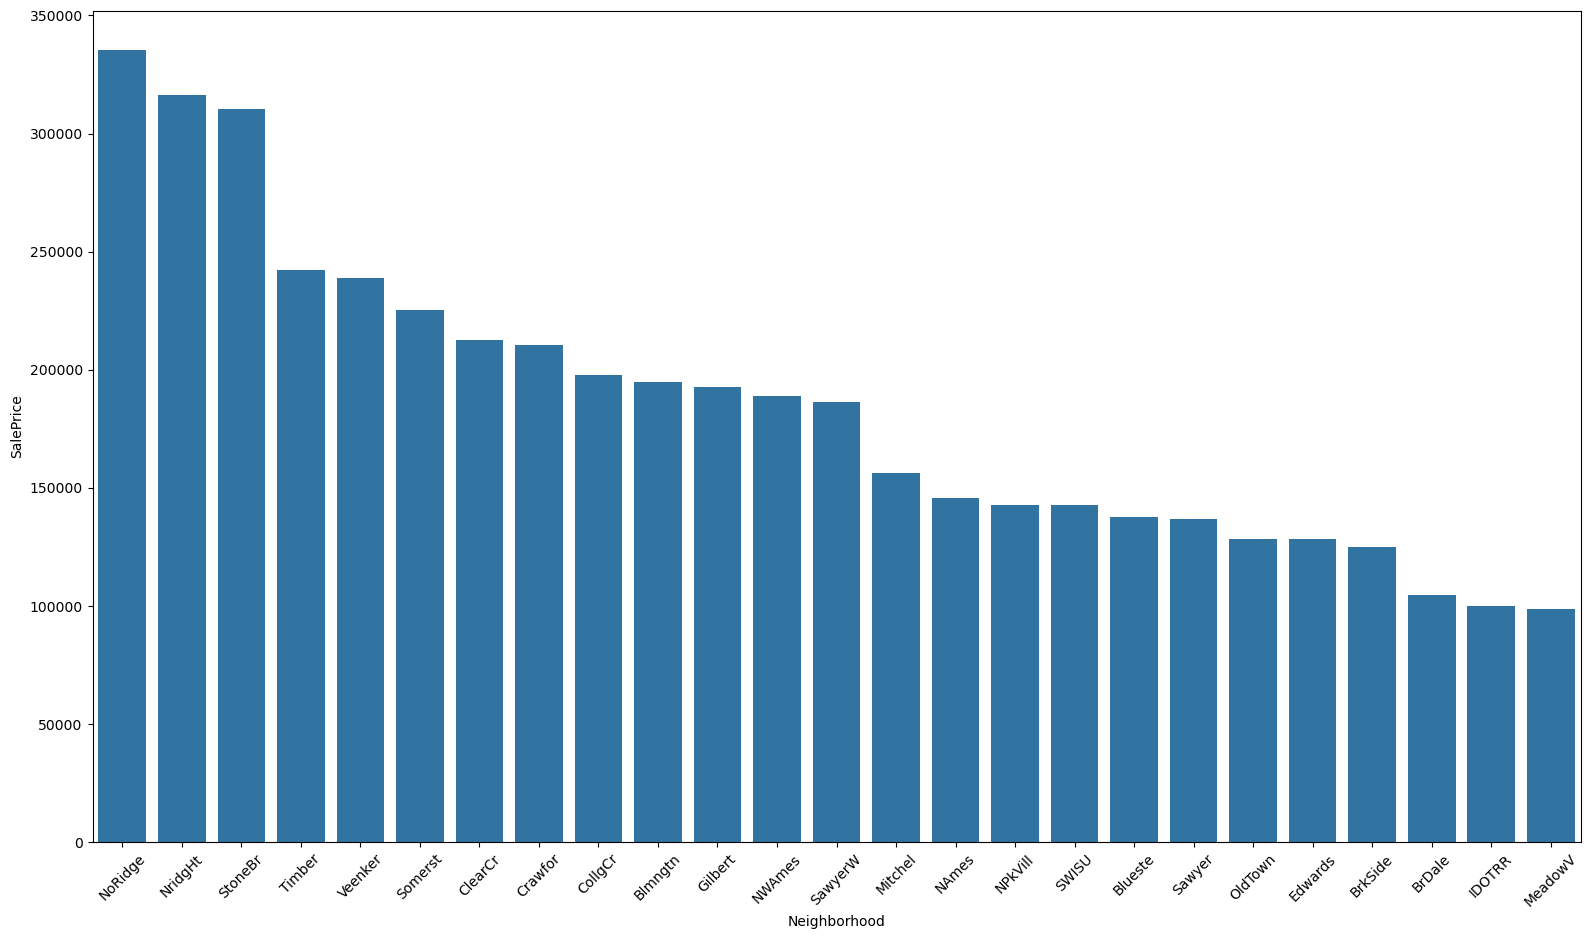

In [45]:
mean_price_by_nh = dfsc.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(19.2, 10.8))
sns.barplot(mean_price_by_nh)
plt.xticks(rotation=45)
plt.savefig('../images/price_by_nhood.png')

### MSZoning

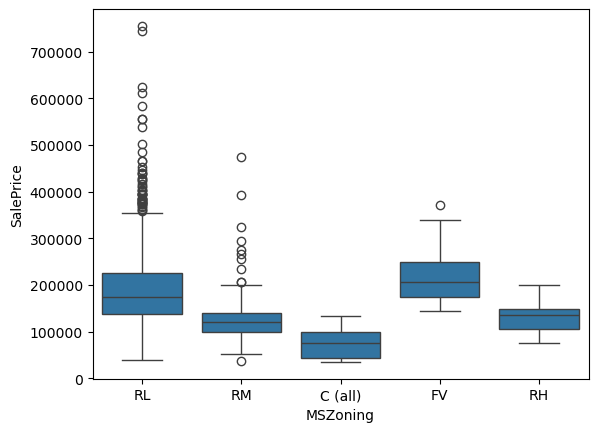

In [46]:
sns.boxplot(dfsc, x='MSZoning', y='SalePrice')
plt.savefig('../images/price_by_zoning_boxplot.png')

En este gráfico observamos el comportamiento del precio segun el tipo de zona mediante un gráfico de cajas.

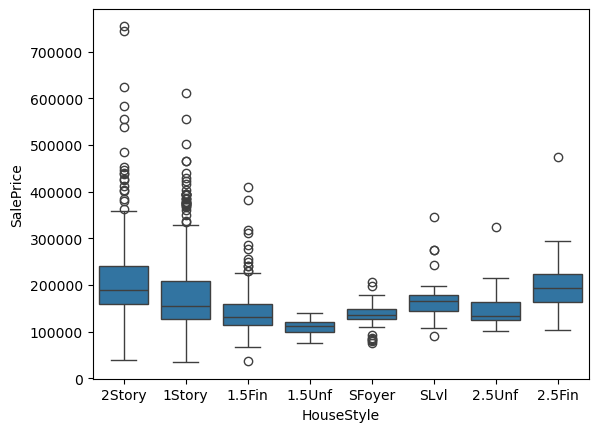

In [47]:
sns.boxplot(dfsc, x='HouseStyle', y='SalePrice')
plt.savefig('../images/price_by_style_boxplot.png')

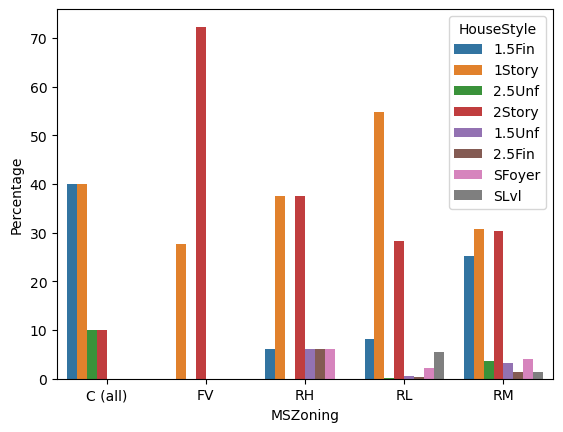

In [48]:
style_by_zoning = dfsc.groupby(['MSZoning', 'HouseStyle'])['HouseStyle'].count().reset_index(name='Count')
total_by_zoning = style_by_zoning.groupby('MSZoning')['Count'].transform('sum')
style_by_zoning['Percentage'] = (100 * (style_by_zoning['Count'] / total_by_zoning)).round(1)
sns.barplot(style_by_zoning, x='MSZoning', y='Percentage', hue='HouseStyle')
plt.savefig('../images/style_by_zoning_barplot.png')

### Estilo de casa por tipo de zona
En este gráfico hemos agrupado las casas por su tipo de zona, comercial, residencial baja densidad, etc. pero tambien lo hemos hecho por el porcentaje que ocupa cada estilo de casa dentro de cada tipo de zona, que van desde simples con uno o dos pisos hasta con pisos y medio y casas con pisos divididos. Lo que podemos observar en el gráfico es la razon de por que las casas en zonas **residenciales** de **baja** y **media** densidad tienen tantos precios atipicos muy altos en relacion a la mediana (valor que tiene el precio del medio si todos estuvieran ordenados), lo que ocurre es que estas zonas estan mayormente compuestas por casas de 1, 2 y 1.5 pisos (ese 0.5 piso puede ser un atico o espacio reducido), estilos de casa que tienen mayor cantidad de precios altos (como se observa en el gráfico anterior a este).

### LotConfig

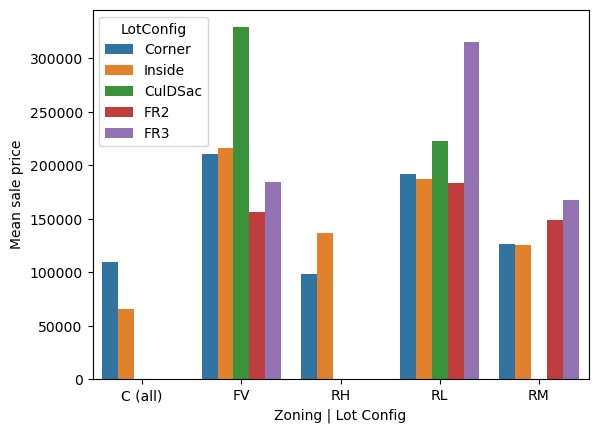

In [49]:
lconfig_by_zone = dfsc.groupby(['MSZoning', 'LotConfig'])['SalePrice'].mean().reset_index()
plt.Figure(figsize=(19.2,10.8))
sns.barplot(lconfig_by_zone, x='MSZoning', y='SalePrice', hue='LotConfig', estimator=np.mean)
plt.xlabel('Zoning | Lot Config')
plt.ylabel('Mean sale price')
plt.savefig('../images/price_by_lotconfig_by_zoning_barplot.png')

Aquí podemos ver como varían los precios de las distintas configuraciones del lote según la zona.